In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image



from tensorflow import keras
from tensorflow.keras import layers 

C:\Users\USER\.conda\envs\tf-gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\USER\.conda\envs\tf-gpu\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\USER\.conda\envs\tf-gpu\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data_train_path = r'C:\Users\USER\Desktop\Layan\Filterd_Numberd_Frames\Filtered_Training-20240528T090858Z-001\Filtered_Training'
#data_validation_path=r'C:\Users\layan\OneDrive\Documents\AI\validation'
data_test_path= r'C:\Users\USER\Desktop\Layan\Filterd_Numberd_Frames\Filtered_Training-20240528T090858Z-001\Filtered_Training'

In [3]:
size = 224
width=224;
height=224;
batch_size = 64

In [4]:
# Define the target size as a tuple
target_size = (width, height)  # Replace 'width' and 'height' with your desired dimensions

# Create the image data generator
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    # Add other preprocessing options as needed
    
)

# Create the data generator
data_generator = image_data_generator.flow_from_directory(
    r'C:\Users\USER\Desktop\Layan\Filterd_Numberd_Frames\Filtered_Training-20240528T090858Z-001\Filtered_Training',
    
    target_size=target_size,  # Pass the tuple as the target_size parameter
    batch_size=batch_size,
    class_mode='binary'  # Set to 'binary' if you have two classes
)


Found 0 images belonging to 0 classes.


In [5]:

# Load the data
df = pd.read_csv(r"C:\Users\USER\Desktop\Layan\filtered_training_csvfile.csv")


In [6]:
x=df[["id"]].values

In [7]:
y=df[["Classification"]].values

In [8]:
data_train = dict(
    
    directory=r'C:\Users\USER\Desktop\Layan\Filterd_Numberd_Frames\Filtered_Training-20240528T090858Z-001\Filtered_Training',
    x_col="image_name",
    y_col="Classification",
    weight_col=None,
    target_size=(size, size),
    color_mode='rgb',
    class_mode="raw",
    batch_size=batch_size,
    shuffle=True,
   
    seed=0,
)

In [9]:
df['image_name'] = df['id'].map('seq_{:06d}.jpg'.format)

In [10]:
df.describe()

,id
count,950.000000
mean,1133.693684
std,462.864112
min,404.000000
25%,712.250000
50%,1104.500000
75%,1547.750000
max,2000.000000


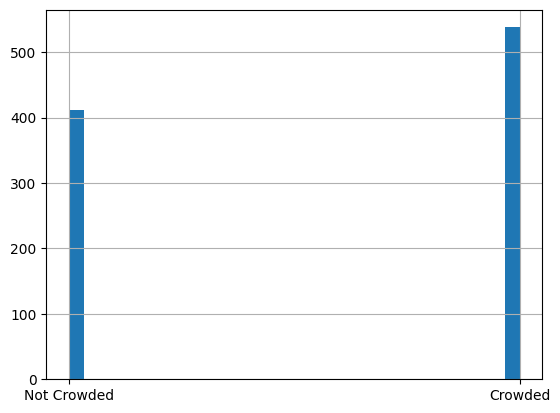

In [11]:
df['Classification'].hist(bins=30);

In [12]:
from tensorflow.keras import layers, models

In [13]:
# Initialize lists to store image data and labels
X_train_list = []
Y_train_list = []

# Load CSV data
csv_data1 = pd.read_csv(r"C:\Users\USER\Desktop\Layan\filtered_training_csvfile.csv")
image_dir = r'C:\Users\USER\Desktop\Layan\Filterd_Numberd_Frames\Filtered_Training-20240528T090858Z-001\Filtered_Training'


csv_data1['image_name'] = (csv_data1['id']).map('seq_{:06d}.jpg'.format)
# Iterate over each row in the CSV data
for index, row in csv_data1.iterrows():
    #print(f"Processing row {index + 1}")
    # Construct image file path with padded integer part starting from 401
    image_filename = row['image_name']
    image_path = os.path.join(image_dir, image_filename)

    # Check if the image file exists
    if not os.path.exists(image_path):
        print(f"Image file '{image_path}' not found. Skipping.")
        continue

    # Load image and convert to array
    image = Image.open(image_path)
    image_array = np.array(image)

    # Append image array to X_train_list
    X_train_list.append(image_array)
    
    # Append classification label to Y_train_list
    Y_train_list.append(row['Classification'])

    if index == 1999:  # Assuming there are 1600 rows in the CSV
        print("Loop completed all iterations.")

# Convert lists to NumPy arrays
X_train = np.array(X_train_list)
Y_train = np.array(Y_train_list)

#print("Number of images in X_train:", len(X_train))


In [14]:
X_train.shape

(950, 480, 640, 3)

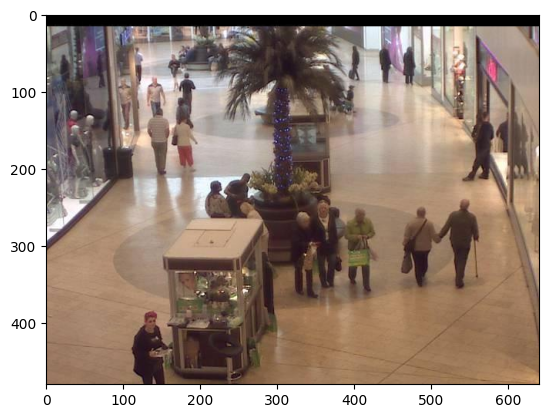

In [15]:
plt.imshow(X_train[1])

In [16]:
Y_train[:10]

array(['Not Crowded', 'Not Crowded', 'Crowded', 'Crowded', 'Crowded',
       'Crowded', 'Crowded', 'Crowded', 'Crowded', 'Crowded'],
      dtype='<U11')

In [17]:
Y_train.shape

(950,)

In [18]:
Y_train=Y_train.reshape(-1,)


In [19]:
classes = ['Not Crowded', 'Crowded']

In [20]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(x[index])
    plt.xlabel((y[index]))

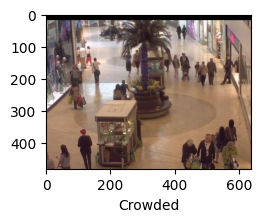

In [21]:
plot_sample(X_train, Y_train, 2)


In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels to numerical values
Y_train = label_encoder.fit_transform(Y_train)

# Print the encoded labels
print("Encoded Labels:", Y_train)


Encoded Labels: [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 

In [23]:
Y_train[0:40]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [24]:
Y_train.shape

(950,)

In [25]:
X_train=X_train/255 #for normalizing

In [26]:
# Initialize lists to store image data and labels
X_test_list = []
Y_test_list = []

# Load CSV data for testing
csv_data_test = pd.read_csv(r"C:\Users\USER\Desktop\Layan\filtered_testing_csvfile.csv")  # Assuming different CSV for testing
image_dir_test = r'C:\Users\USER\Desktop\Layan\Filterd_Numberd_Frames\Filtered_Testing-20240528T090858Z-001\Filtered_Testing'  # Change the directory path for testing images

csv_data_test['image_name'] = (csv_data_test['id']+1).map('seq_{:06d}.jpg'.format)

# Iterate over each row in the CSV data for testing
for index, row in csv_data_test.iterrows():
    if index >= 250:
        break  # Stop the loop when index reaches 400
        
    # Construct image file path with padded integer part starting from 1
    image_filename = row['image_name']
    image_path = os.path.join(image_dir_test, image_filename)

    # Check if the image file exists
    if not os.path.exists(image_path):
        print(f"Image file '{image_path}' not found. Skipping.")
        continue

    # Load image and convert to array
    image = Image.open(image_path)
    image_array = np.array(image)

    # Append image array to X_test_list
    X_test_list.append(image_array)
    
    # Append classification label to Y_test_list
    Y_test_list.append(row['Classification'])

# Convert lists to NumPy arrays
X_test = np.array(X_test_list)
Y_test = np.array(Y_test_list)


In [27]:
Y_test.shape

(241,)

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels to numerical values
Y_test= label_encoder.fit_transform(Y_test)

# Print the encoded labels
#print("Encoded Labels:", Y_test)


In [29]:
Y_test[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [30]:
X_test.shape

(241, 480, 640, 3)

In [31]:
X_test=X_test/255 #for normalizing

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn = Sequential([
    # CNN layers
    # First Convolutional Layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Second Convolutional Layer
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),  # Removed input_shape
    MaxPooling2D((2, 2)),
    
    # Dense layers
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [33]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
# Train the model
cnn.fit(X_train, Y_train, epochs=20,validation_split=0.2)

Epoch 1/20
24/24 [==============================] - 11s 199ms/step - loss: 14.2041 - accuracy: 0.5197 - val_loss: 0.5762 - val_accuracy: 0.8105
Epoch 2/20
24/24 [==============================] - 3s 138ms/step - loss: 0.4153 - accuracy: 0.8211 - val_loss: 0.6902 - val_accuracy: 0.5421
Epoch 3/20
24/24 [==============================] - 3s 144ms/step - loss: 0.2623 - accuracy: 0.8987 - val_loss: 0.3323 - val_accuracy: 0.8737
Epoch 4/20
24/24 [==============================] - 3s 136ms/step - loss: 0.0968 - accuracy: 0.9789 - val_loss: 0.2916 - val_accuracy: 0.8684
Epoch 5/20
24/24 [==============================] - 3s 136ms/step - loss: 0.0300 - accuracy: 0.9987 - val_loss: 0.1463 - val_accuracy: 0.9474
Epoch 6/20
24/24 [==============================] - 3s 133ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.3173 - val_accuracy: 0.8526
Epoch 7/20
24/24 [==============================] - 3s 133ms/step - loss: 0.0104 - accuracy: 0.9987 - val_loss: 0.1984 - val_accuracy: 0.9105
Epoc

In [35]:
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
#### from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
# Predict probabilities
Y_predict_prob = cnn.predict(X_test)

# Convert probabilities to class labels
Y_predict = np.argmax(Y_predict_prob, axis=1)

# Calculate mean absolute error
mae = mean_absolute_error(Y_test, Y_predict)
print(f'MAE: {mae}')

# Calculate accuracy
accuracy = 100 * (1 - (mae / Y_test.mean()))
print(f'Accuracy: {accuracy:.1f}%')

# Evaluate loss
loss = cnn.evaluate(X_test, Y_test)[0]
print(f'Loss: {loss:.1f}')

print("Classification Report: \n", classification_report(Y_test, Y_predict))


8/8 [==============================] - 1s 73ms/step
MAE: 0.1078838174273859
Accuracy: 70.8%
8/8 [==============================] - 0s 48ms/step - loss: 0.3901 - accuracy: 0.8921
Loss: 0.4
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       152
           1       0.81      0.92      0.86        89

    accuracy                           0.89       241
   macro avg       0.88      0.90      0.89       241
weighted avg       0.90      0.89      0.89       241



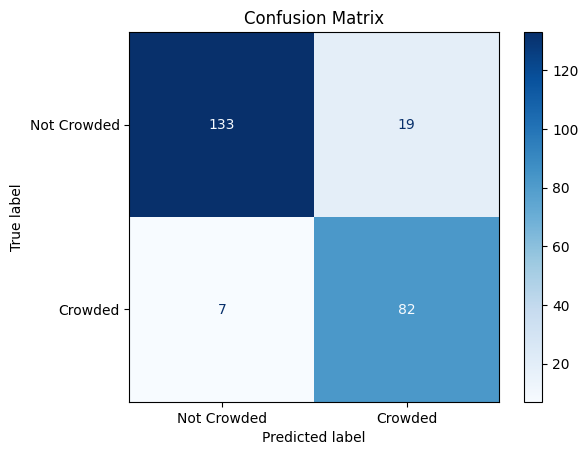

In [36]:
import matplotlib.pyplot as plt


cm = confusion_matrix(Y_test, Y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Crowded', 'Crowded'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

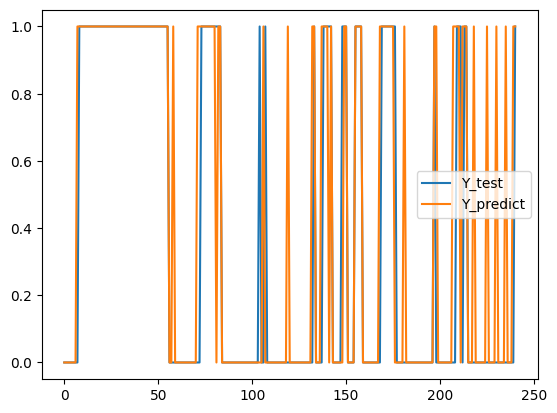

In [37]:
#plot 
plt.plot(Y_test)
plt.plot(Y_predict)
#plt.plot(Y_train)
#plt.plot(train)
plt.legend(['Y_test', 'Y_predict'])

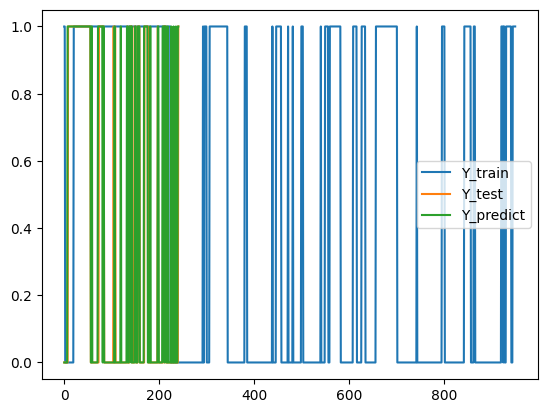

In [38]:
#plot 
plt.plot(Y_train)
plt.plot(Y_test)
plt.plot(Y_predict)
#plt.plot(train)
plt.legend(['Y_train','Y_test', 'Y_predict'])